<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-10-03 00:55:02--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-10-03 00:55:02--  https://github.com/books-by-chansung/ds-bookcamp/raw/refs/heads/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf [following]
--2024-10-03 00:55:03--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/refs/heads/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.git

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

## 20-1

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
num_classes = len(set(y))
print(f"{y.size} 개의 레이블이 달린 데이터가 있으며, 다음과 같이 "
     f"{num_classes} 개의 범주를 가집니다\n{set(y)}\n")
print(f"처음 네 개의 특징 열\n{X[:4]}")
print(f"\n처음 네 개의 레이블\n{y[:4]}")

150 개의 레이블이 달린 데이터가 있으며, 다음과 같이 3 개의 범주를 가집니다
{0, 1, 2}

처음 네 개의 특징 열
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]

처음 네 개의 레이블
[0 0 0 0]


## 20-2

In [ ]:
sampling_size = int(y.size / 4)
X_train, y_train = X[:sampling_size], y[:sampling_size]
print(f"학습용 데이터셋에 포함된 레이블\n{y_train}")

학습용 데이터셋에 포함된 레이블
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 20-3

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)
print(f"학습용 데이터셋에 포함된 레이블\n{y_train}")

학습용 데이터셋에 포함된 레이블
[0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


## 20-4

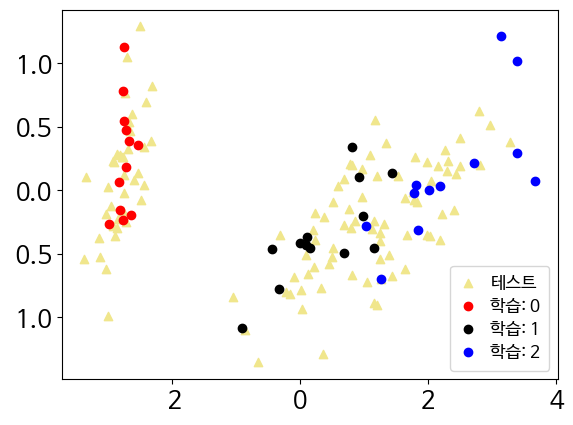

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_model = PCA()
transformed_data_2D = pca_model.fit_transform(X_train)

unlabeled_data = pca_model.transform(X_test)
plt.scatter(unlabeled_data[:,0], unlabeled_data[:,1],
         color='khaki', marker='^', label='테스트')

for label in range(3):
    data_subset = transformed_data_2D[y_train == label]
    plt.scatter(data_subset[:,0], data_subset[:,1],
             color=['r', 'k', 'b'][label], label=f'학습: {label}')

plt.legend(loc='lower right',
           fontsize='x-small',
           handlelength=1,
           borderpad=0.5,
           labelspacing=0.3)
plt.show()

## 20-5

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
distance_matrix = euclidean_distances(X_test, X_train)

f_train, f_test = X_test[0], X[0]
distance = distance_matrix[0][0]
print(f"첫 번째 테스트 데이터의 특징은 {f_train} 입니다")
print(f"첫 번째 학습용 데이터의 특징은 {f_test} 입니다")
print(f"특징들 사이의 유클리드 거리는 {distance:.2f} 입니다")

첫 번째 테스트 데이터의 특징은 [5.8 2.8 5.1 2.4] 입니다
첫 번째 학습용 데이터의 특징은 [5.1 3.5 1.4 0.2] 입니다
특징들 사이의 유클리드 거리는 4.18 입니다


## 20-6

In [ ]:
from collections import Counter
np.random.seed(6)
random_index = np.random.randint(y_test.size)
labeled_distances = distance_matrix[random_index]
labeled_neighbors = np.argsort(labeled_distances)[:3]
labels = y_train[labeled_neighbors]

top_label, count = Counter(labels).most_common()[0]
print(f"세 개의 최근점 이웃 ({random_index})의 "
     f"레이블은 다음과 같습니다\n{labels}")
print(f"\n{count} 회로 가장 빈번하게 나타나는 레이블은 {top_label} 입니다.")

세 개의 최근점 이웃 (10)의 레이블은 다음과 같습니다
[2 1 2]

2 회로 가장 빈번하게 나타나는 레이블은 2 입니다.


## 20-7

In [ ]:
true_label = y_test[random_index]
print(f"데이터 {random_index}의 실제 클래스는 {true_label} 입니다")

데이터 10의 실제 클래스는 2 입니다


## 20-8

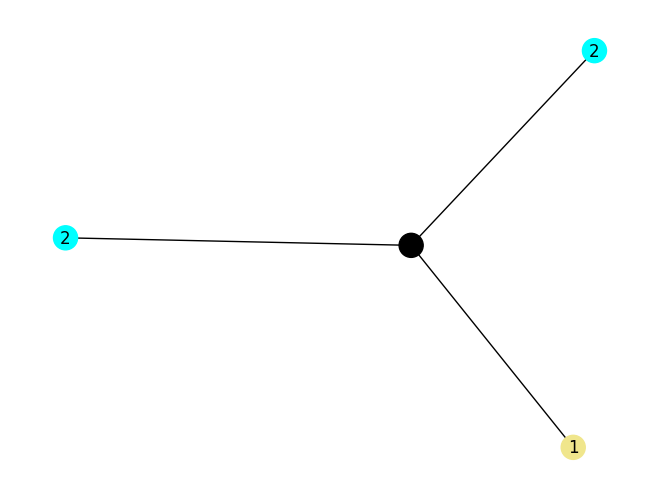

In [ ]:
import networkx as nx
np.random.seed(0)

def generate_neighbor_graph(unlabeled_index, labeled_neighbors):
    G = nx.Graph()
    nodes = [(i, {'label': y_train[i]}) for i in labeled_neighbors]
    nodes.append((unlabeled_index, {'label': 'U'}))
    G.add_nodes_from(nodes)
    G.add_edges_from([(i, unlabeled_index) for i in labeled_neighbors])
    labels = y_train[labeled_neighbors]
    label_colors = ['pink', 'khaki', 'cyan']
    colors = [label_colors[y_train[i]] for i in labeled_neighbors] + ['k']
    labels = {i: G.nodes[i]['label'] for i in G.nodes}
    nx.draw(G, node_color=colors, labels=labels, with_labels=True)
    plt.show()
    return G

G = generate_neighbor_graph(random_index, labeled_neighbors)

## 20-9

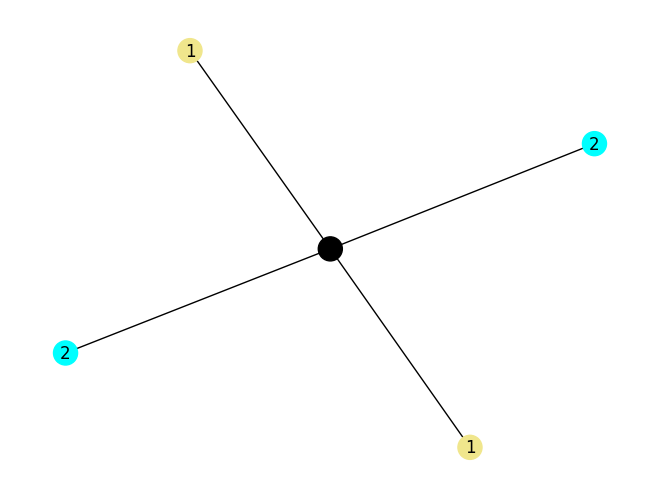

In [ ]:
np.random.seed(0)
labeled_neighbors = np.argsort(labeled_distances)[:4]
G = generate_neighbor_graph(random_index, labeled_neighbors)

## 20-10

In [ ]:
from collections import defaultdict
class_to_votes = defaultdict(int)
for node in G.neighbors(random_index):
    label = G.nodes[node]['label']
    distance = distance_matrix[random_index][node]
    num_votes = 1 / distance
    print(f"레이블이 {label}인 데이터는 {distance:.2f} 단위 만큼 떨어져 있습니다. "
         f"{num_votes:.2f} 개의 투표를 받았습니다.")
    class_to_votes[label] += num_votes

print()
for class_label, votes in class_to_votes.items():
    print(f"{class_label} 범주는 {votes:.2f}번의 투표를 받았습니다")

top_class = max(class_to_votes.items(), key=lambda x: x[1])[0]
print(f"범주 {top_class} 가 가장 많은 투표를 받았습니다")

레이블이 2인 데이터는 0.54 단위 만큼 떨어져 있습니다. 1.86 개의 투표를 받았습니다.
레이블이 1인 데이터는 0.74 단위 만큼 떨어져 있습니다. 1.35 개의 투표를 받았습니다.
레이블이 2인 데이터는 0.77 단위 만큼 떨어져 있습니다. 1.29 개의 투표를 받았습니다.
레이블이 1인 데이터는 0.98 단위 만큼 떨어져 있습니다. 1.02 개의 투표를 받았습니다.

2 범주는 3.15번의 투표를 받았습니다
1 범주는 2.36번의 투표를 받았습니다
범주 2 가 가장 많은 투표를 받았습니다


## 20-11

In [ ]:
def predict(index, K=1, weighted_voting=False):
    labeled_distances = distance_matrix[index]
    labeled_neighbors = np.argsort(labeled_distances)[:K]
    class_to_votes = defaultdict(int)
    for neighbor in labeled_neighbors:
        label = y_train[neighbor]
        distance = distance_matrix[index][neighbor]
        num_votes = 1 / max(distance, 1e-10) if weighted_voting else 1
        class_to_votes[label] += num_votes
    return max(class_to_votes, key=lambda x: class_to_votes[x])

assert predict(random_index, K=3) == 2
assert predict(random_index, K=4, weighted_voting=True) == 2

## 20-12

In [ ]:
y_pred = np.array([predict(i) for i in range(y_test.size)])

## 20-13

In [ ]:
print(f"예측된 범주\n{y_pred}")
print(f"\n실제 범주\n{y_test}")

예측된 범주
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 2 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 0 2 1 1 1 2 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1]

실제 범주
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1]


## 20-14

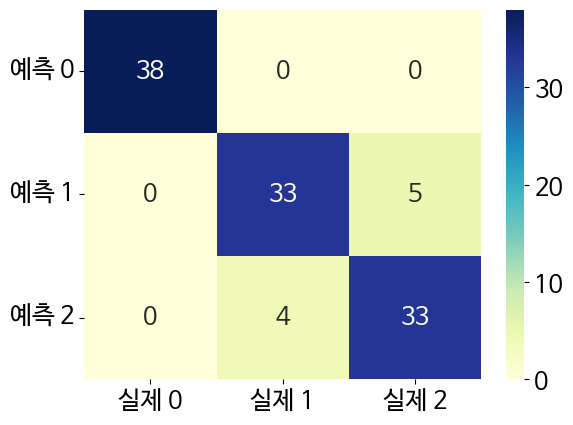

In [ ]:
import seaborn as sns
def compute_confusion_matrix(y_pred, y_test):
    num_classes = len(set(y_pred) | set(y_test))
    confusion_matrix = np.zeros((num_classes, num_classes))
    for prediction, actual in zip(y_pred, y_test):
        confusion_matrix[prediction][actual] += 1
    return confusion_matrix

M = compute_confusion_matrix(y_pred, y_test)
sns.heatmap(M, annot=True, cmap='YlGnBu',
            yticklabels=[f"예측 {i}" for i in range(3)],
            xticklabels = [f"실제 {i}" for i in range(3)])
plt.yticks(rotation=0)
plt.show()

## 20-15

In [ ]:
num_accurate_predictions = M.diagonal().sum()
print(f"총 {int(num_accurate_predictions)} 개의 예측이 정확합니다")

총 104 개의 예측이 정확합니다


## 20-16

In [ ]:
accuracy = M.diagonal().sum() / M.sum()
assert accuracy == 104 / (104 + 9)
print(f"예측 정확도는 {100 * accuracy:.0f}% 입니다")

예측 정확도는 92% 입니다


## 20-17

In [ ]:
row1_sum = M[1].sum()
print(f"{int(row1_sum)} 개의 데이터의 클래스가 1 이라고 예측되었습니다")

38 개의 데이터의 클래스가 1 이라고 예측되었습니다


## 20-18

In [ ]:
precision = M[1][1] / M[1].sum()
assert precision == 33 / 38
print(f"클래스 1의 정밀도는 {precision:.2f} 입니다")

클래스 1의 정밀도는 0.87 입니다


## 20-19

In [ ]:
col1_sum = M[:,1].sum()
assert col1_sum == y_test[y_test == 1].size
print(f"테스트셋의 {int(col1_sum)} 개의 요소가 클래스 1에 속합니다")

테스트셋의 37 개의 요소가 클래스 1에 속합니다


## 20-20

In [ ]:
recall = M[1][1] / M[:,1].sum()
assert recall == 33 / 37
print(f"클래스 1의 재현율은 {recall:.2f} 입니다")

클래스 1의 재현율은 0.89 입니다


## 20-21

In [ ]:
low_precision = M[1][1] / M.sum()
print(f"최대화된 재현율에서의 정밀도는 {low_precision:.2f} 입니다")

최대화된 재현율에서의 정밀도는 0.29 입니다


## 20-22

In [ ]:
inverse_average = (1 / precision + 1 / recall) / 2
print(f"역수를 취한 지표들의 평균은 {inverse_average:.2f} 입니다")

역수를 취한 지표들의 평균은 1.14 입니다


## 20-23

In [ ]:
result = 1 / inverse_average
print(f"평균의 역수는 {result:.2f} 입니다")

평균의 역수는 0.88 입니다


## 20-24

In [ ]:
f_measure = 2 * precision * recall / (precision + recall)
print(f"클래스 1의 f-측정치는 {f_measure:.2f} 입니다")

클래스 1의 f-측정치는 0.88 입니다


## 20-25

In [ ]:
tp, fp, fn = 1, 1, 0
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = 2 * precision * recall / (precision + recall)
average = (precision + recall) / 2
print(f"정밀도: {precision}")
print(f"재현율: {recall}")
print(f"평균: {average}")
print(f"F-측정치: {f_measure:.2f}")

정밀도: 0.5
재현율: 1.0
평균: 0.75
F-측정치: 0.67


## 20-26

In [ ]:
def compute_f_measures(M):
    precisions = M.diagonal() / M.sum(axis=0)
    recalls = M.diagonal() / M.sum(axis=1)
    return 2 * precisions * recalls / (precisions + recalls)

f_measures = compute_f_measures(M)
for class_label, f_measure in enumerate(f_measures):
    print(f"클래스 {class_label}에 대한 f-측정치는 {f_measure:.2f} 입니다")

클래스 0에 대한 f-측정치는 1.00 입니다
클래스 1에 대한 f-측정치는 0.88 입니다
클래스 2에 대한 f-측정치는 0.88 입니다


## 20-27

In [ ]:
avg_f = f_measures.mean()
print(f"통합 f-측정치는 {avg_f:.2f} 입니다")

통합 f-측정치는 0.92 입니다


## 20-28

In [ ]:
M_imbalanced = np.array([[99, 0], [1, 1]])
accuracy_imb = M_imbalanced.diagonal().sum() / M_imbalanced.sum()
f_measure_imb = compute_f_measures(M_imbalanced).mean()
print(f"불균형한 데이터셋에 대한 정확도는 {accuracy_imb:.2f} 입니다")
print(f"불균형한 데이터셋에 대한f-측정치는 {f_measure_imb:.2f} 입니다")

불균형한 데이터셋에 대한 정확도는 0.99 입니다
불균형한 데이터셋에 대한f-측정치는 0.83 입니다


## 20-29

In [ ]:
from sklearn.metrics import confusion_matrix
new_M = confusion_matrix(y_pred, y_test)
assert np.array_equal(new_M, M)
print(new_M)

[[38  0  0]
 [ 0 33  5]
 [ 0  4 33]]


## 20-30

In [ ]:
from sklearn.metrics import accuracy_score
assert accuracy_score(y_pred, y_test) == accuracy

## 20-31

In [ ]:
from sklearn.metrics import f1_score
new_f_measures = f1_score(y_pred, y_test, average=None)
assert np.array_equal(new_f_measures, f_measures)
print(new_f_measures)

[1.   0.88 0.88]


## 20-32

In [ ]:
new_f_measure = f1_score(y_pred, y_test, average='macro')
assert new_f_measure == new_f_measures.mean()
assert new_f_measure == avg_f

## 20-33

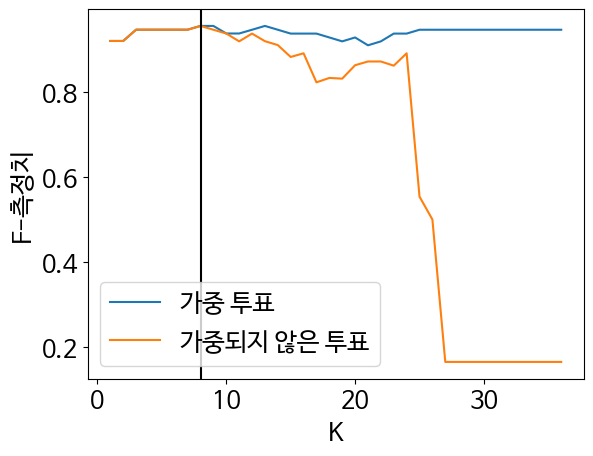

In [ ]:
k_values = range(1, y_train.size)
weighted_voting_bools = [True, False]
f_scores = [[], []]

params_to_f = {}
for k in k_values:
    for i, weighted_voting in enumerate(weighted_voting_bools):
        y_pred = np.array([predict(i, K=k,
                         weighted_voting=weighted_voting)
                         for i in range(y_test.size)])
        f_measure = f1_score(y_pred, y_test, average='macro')
        f_scores[i].append(f_measure)
        params_to_f[(k, weighted_voting)] = f_measure

(best_k, best_weighted), best_f = max(params_to_f.items(), key=lambda x: x[1])
plt.plot(k_values, f_scores[0], label='가중 투표')
plt.plot(k_values, f_scores[1], label='가중되지 않은 투표')
plt.axvline(best_k, c='k')
plt.xlabel('K')
plt.ylabel('F-측정치')
plt.legend()
plt.show()

## 20-34

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## 20-35

In [ ]:
clf = KNeighborsClassifier()

## 20-36

In [ ]:
K = clf.n_neighbors
weighted_voting = clf.weights
print(f"K는 {K}로 설정되어 있습니다.")
print(f"weighted_voting은 '{weighted_voting}'로 설정되어 있습니다.")

K는 5로 설정되어 있습니다.
weighted_voting은 'uniform'로 설정되어 있습니다.


## 20-37

In [ ]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
assert clf.n_neighbors == 4
assert clf.weights == 'distance'

## 20-38

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

## 20-39

In [ ]:
y_pred = clf.predict(X_test)
f_measure = f1_score(y_pred, y_test, average='macro')
print(f"예측된 클래스는 다음과 같습니다.\n{y_pred}")
print(f"\nf-측정치는 {f_measure:.2f}와 같습니다.")

예측된 클래스는 다음과 같습니다.
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1]

f-측정치는 0.95와 같습니다.


## 20-40

In [ ]:
vote_ratios = clf.predict_proba(X_test)
print(vote_ratios[:4])

[[0.         0.21419074 0.78580926]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]]


## 20-41

In [ ]:
hyperparams = {'n_neighbors': range(1, 40),
               'weights': ['uniform', 'distance']}

## 20-42

In [ ]:
from sklearn.model_selection import GridSearchCV

## 20-43

In [ ]:
clf_grid = GridSearchCV(KNeighborsClassifier(), hyperparams, scoring='f1_macro')

## 20-44

In [ ]:
clf_grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40),
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

## 20-45

In [ ]:
best_f = clf_grid.best_score_
best_params = clf_grid.best_params_
print(f"최대 f-측정치는 {best_f:.2f} 이며, 아래의 "
     f"하이퍼파라미터 조합을 통해 달성되었습니다.\n{best_params}")

최대 f-측정치는 0.99 이며, 아래의 하이퍼파라미터 조합을 통해 달성되었습니다.
{'n_neighbors': 10, 'weights': 'distance'}


## 20-46

In [ ]:
clf_best = clf_grid.best_estimator_
assert clf_best.n_neighbors == best_params['n_neighbors']
assert clf_best.weights == best_params['weights']

## 20-47

In [ ]:
assert np.array_equal(clf_grid.predict(X), clf_best.predict(X))

## 20-48

In [ ]:
import time
X_large = np.vstack([X for _ in range(2000)])
y_large = np.hstack([y for _ in range(2000)])
clf_grid = GridSearchCV(KNeighborsClassifier(), hyperparams, scoring='f1_macro')
start_time = time.time()
clf_grid.fit(X_large, y_large)
running_time = (time.time() - start_time) / 60
print(f"격자 탐색에는 {running_time:.2f} 분 소요되었습니다.")

격자 탐색에는 35.63 분 소요되었습니다.
